This is the second visualization, It display the relationship between genres and gross <br>
For user-friendly, only display the top 10 genres between 2010 to 2020

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

display top 10 genres between 2010 to 2020

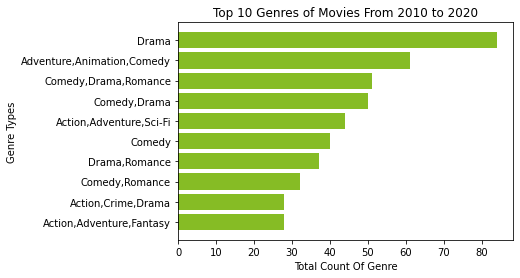

In [5]:
# open the file
df_gross = pd.read_csv('df_gross.zip')

# display bar plot of top 10 genres that occure the most between 2010 to 2020
plt.barh(list(df_gross['genres'].value_counts().index.tolist())[:10], df_gross['genres'].value_counts()[:10], color = '#86BC25')
plt.gca().invert_yaxis()

plt.title('Top 10 Genres of Movies From 2010 to 2020')
plt.xlabel('Total Count Of Genre')
plt.ylabel('Genre Types')

plt.show()


for user-friendly purpose, use units in million

In [11]:
df_gross['domestic_gross_y_in_m'] = df_gross['domestic_gross_y']/1000000

group the movies by genres, and only keep the domestic gross of genres in top 10

In [12]:
# group table by genres and sort it in descending order
series_tmp = df_gross.groupby('genres')['domestic_gross_y_in_m'].median().sort_values(ascending = False)

# take top 10 genres
tmp_list = list(df_gross['genres'].value_counts().index.tolist())[:10]
series_tmp = series_tmp.reset_index()

# only take the genres in top 10
series_tmp = series_tmp[series_tmp['genres'].isin(tmp_list)]
series_tmp

,genres,domestic_gross_y_in_m
7,"Action,Adventure,Sci-Fi",215.816297
19,"Adventure,Animation,Comedy",123.087120
41,"Action,Adventure,Fantasy",59.993997
46,Comedy,53.895268
76,"Comedy,Romance",39.977244
101,"Action,Crime,Drama",29.288556
138,"Comedy,Drama",18.419242
140,"Comedy,Drama,Romance",17.550872
157,"Drama,Romance",12.816367
159,Drama,12.734171


display domestic gross of top 10 genres

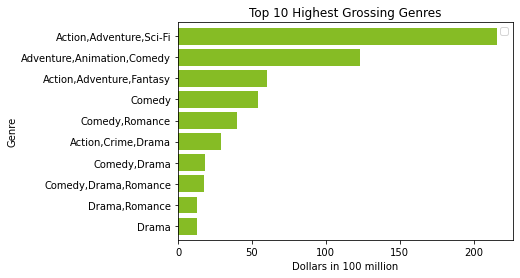

In [14]:
# create dataframe from series that only includes domestic gross of top 10 genres
df_graph = pd.DataFrame(series_tmp)

# draw bar plot
df_graph[:10].plot.barh(color = '#86BC25', width=0.8).set_yticklabels(df_graph['genres'])

plt.gca().invert_yaxis()

plt.title('Top 10 Highest Grossing Genres')
plt.xlabel('Dollars in 100 million')
plt.ylabel('Genre')
plt.legend('')

plt.show()
